## Statistical Methods - Assignment week 3
By: Jorrit Bootsma --- Student nr.: 10251499

In [1]:
import numpy as np
import scipy.stats as ss
import scipy.optimize as so
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import division
from sympy import *

%matplotlib inline
percent = Symbol('%')

# Question 1.

The null hypothesis is: 

<b>All the dices are fair dices</b>

Degrees of freedom = n - 1 = 100 - 1 = 99 (since we have 100 trials per mean)

Dice number 64 has a t-statistic of 3.252 (which is the maximum over all dices) with a p-value 0.0016


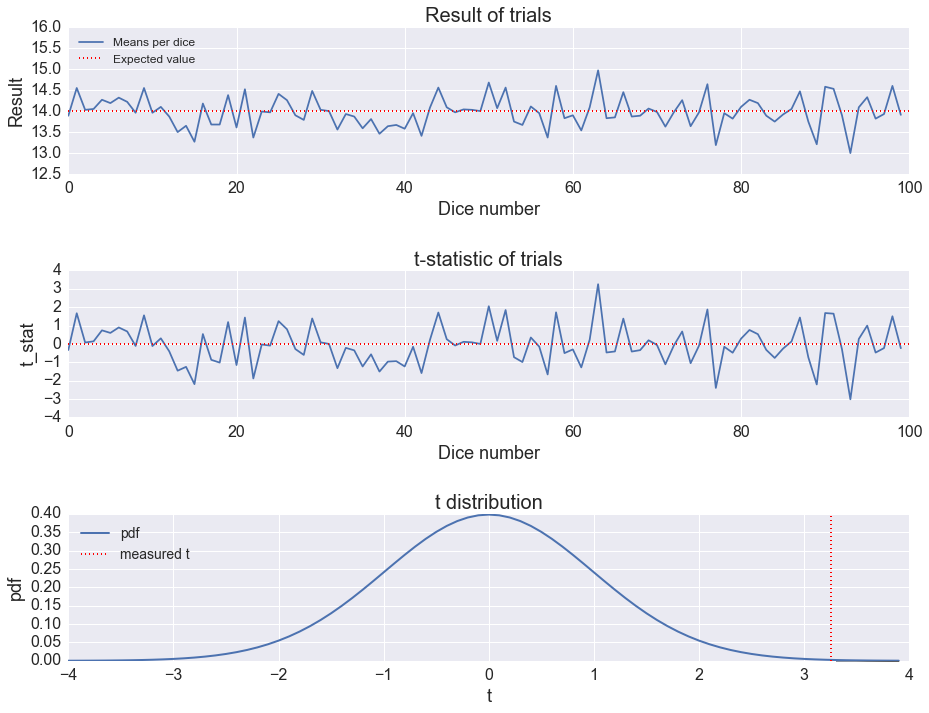

p value from t-distribution for 64th dice = 0.0016, which is in agreement with the earlier calculated value.

So indeed our confidence that the null hypothesis should be rejected is equal to: 1 - p = 99.84%
which is all based on the results of dice number 64.
However, this outlier is part of an experiment that consists of 100 trials really. The probability that an outlier not occurs
is 0.9984^100 = 0.8547 which means that there is a 14.53% chance that it is just a coincidence. Based on this number I will not
conclude that there is a loaded dice.


In [263]:
# Pull data from .txt file
rawdata = np.genfromtxt("dicerolls.txt", dtype=np.float, skip_header=1, autostrip=True)

# Initialize variables used and dummy list for getting the data in the right shape later
dice = 0
trial = 0
means = []
dices = np.arange(0, 100, 1)
trials = np.arange(0, 100, 1)
data = [['foo' for i in dices] for j in trials]

# Fill the 2D array with the results of the trials
for i in range(1, 10001):  
    data[dice][trial] = rawdata[i - 1][2]    
    trial += 1
    if (i % 100 == 0):
        dice += 1
        trial = 0

# Calculate the mean for every dice
for dice in dices:
    means.append(np.mean(data[dice]))
    
# Calculate expectation value
p = 1 / 6
options = np.arange(1, 7, 1)
exp = 4 * sum(p * options)

# Calculate t-statistics and p-values for all dices
tstat_all = []
pval_all = []
for s in dices:
    tstat, pval = ss.ttest_1samp(data[s], popmean=exp)
    tstat_all.append(tstat)
    pval_all.append(pval)

# Calculate the maximum, positive deviation from the population mean (= expectation value)
max_dev = tstat_all.index(max(tstat_all))
conf = 1 - pval_all[max_dev]

print "Dice number %i has a t-statistic of %.3f (which is the maximum over all dices) with a p-value %.4f" % (max_dev + 1, tstat_all[max_dev], pval_all[max_dev])

# Freeze t-distribution to check the calculated p-value (df=99 since we have 100 trials per mean)
t = ss.t(df=99)
x = np.arange(-4,4.,0.1)
pval_t = 2 * t.sf((tstat_all[max_dev]))

# Initialize figure
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=False, figsize=(13,10))

# Draw plot of the means
ax1.plot(dices, means, label='Means per dice')
ax1.axhline(exp, color='r', linestyle='dotted', lw=2, label='Expected value')
ax1.axis([0, 100, 12.5, 16])

# Draw plot of the t-statistics
ax2.plot(dices, tstat_all)
ax2.axhline(0, color='r', linestyle='dotted', lw=2)

# Draw the t-distribution with the measured t-statistic
ax3.plot(x, t.pdf(x), lw=2, label='pdf')
ax3.axvline(x=tstat_all[max_dev], color='r', linestyle='dotted', lw=2, label='measured t')
ax3.fill_between(x, 0, t.pdf(x), where=(x>=tstat_all[max_dev]))


# Layout of the plots
ax1.set_title("Result of trials", fontsize=20)
ax1.set_ylabel('Result', fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(loc="upper left", fontsize=12)
ax1.set_xlabel('Dice number', fontsize=18)

ax2.set_title("\nt-statistic of trials", fontsize=20)
ax2.set_ylabel('t_stat', fontsize=18)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_xlabel('Dice number', fontsize=18)

ax3.set_title("\nt distribution", fontsize=20)
ax3.set_ylabel('pdf', fontsize=18)
ax3.set_xlabel('t', fontsize=18)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)
ax3.legend(loc="upper left", fontsize=14)

plt.tight_layout()
plt.show()


# Print results
print "p value from t-distribution for %ith dice = %.4f, which is in agreement with the earlier calculated value." % (max_dev + 1, pval_t)

print "\nSo indeed our confidence that the null hypothesis should be rejected is equal to: 1 - p = %.2f%s" % (100 * conf, percent)
print 'which is all based on the results of dice number %i.' % (max_dev + 1)
print 'However, this outlier is part of an experiment that consists of 100 trials really. The probability that an outlier \
not occurs\nis %.4f^100 = %.4f which means that there is a %.2f%s chance that it is just a coincidence. Based on this number I will \
not\nconclude that there is a loaded dice.' % (conf, conf**100, 100 * (1 - conf**100),percent)

# Question 2.

See uploaded pdf file.

# Question 3.

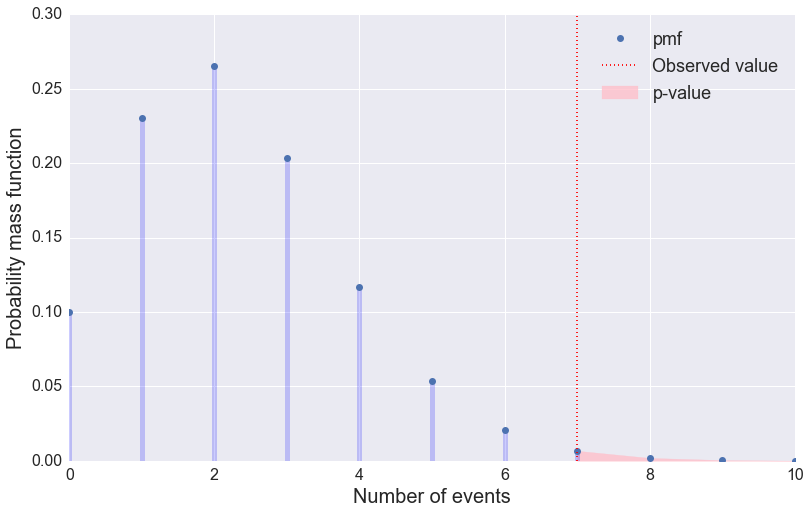

p-value: 0.0094
confidence: 0.9906
sigma: 2.60


The probability of measuring 7 events or more as a result of background noise (with a rate of 2.3) is: 0.0094.
This corresponds to a sigma level of 2 or a confidence level of 99.06%.


For observing 6 events, the sigma level is 2.17
For observing 7 events, the sigma level is 2.60
For observing 8 events, the sigma level is 3.01
The number of events predicted by the model that corresponds to a 3 sigma upper limit given that the background is 2.3 is 8.


In [264]:
def p_to_sigmas(pval):
    nd = ss.norm(0., 1.)
    return nd.isf(pval/2.)

def sigmas_to_p(sigval):
    nd = ss.norm(0., 1.)
    return 2.*nd.sf(sigval)

obs = 7
backgr = 2.3

p = ss.poisson(backgr)
x = np.arange(0, 11, 1)

# Initialize figure
fig, ax1 = plt.subplots(1,1, sharex=False, figsize=(13,8))

# Draw plot
ax1.plot(x, p.pmf(x), 'o', label="pmf")
ax1.axvline(obs, linestyle='dotted', color='red', label="Observed value")
ax1.vlines(x, 0, p.pmf(x), colors="b", lw=5, alpha=0.2)
ax1.fill_between(x, 0, p.pmf(x), where=(x>=obs), interpolate=True, color='#ffc0cb', alpha=0.8, label="p-value")

# Plot layout
ax1.set_ylabel('Probability mass function', fontsize=20)
ax1.set_xlabel('Number of events', fontsize=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(loc="upper right", fontsize=18)
plt.show()

# 'obs - 1', because sf starts from 'argument + 1'
pval = p.sf(obs - 1)
print 'p-value: %.4f' % pval

confidence = 1 - pval
print 'confidence: %.4f' % confidence

sigma = p_to_sigmas(pval)
print 'sigma: %.2f' % sigma
print '\n'
print "The probability of measuring %i events or more as a result of background noise (with a rate of %.1f) is: %.4f." % (obs, backgr, pval)
print "This corresponds to a sigma level of %i or a confidence level of %.2f%s." % (floor(sigma), 100 * confidence, percent)
print '\n'

obstest = [6, 7, 8, 9, 10]
limit = 3

for num in obstest:
    pnew = ss.poisson(backgr)
    pvalnew = pnew.sf(num - 1)
    sigmanew = p_to_sigmas(pvalnew)
    if sigmanew < limit:
        print "For observing %i events, the sigma level is %.2f" % (num, sigmanew)
    else:
        print "For observing %i events, the sigma level is %.2f" % (num, sigmanew)
        result = num
        break

print "The number of events predicted by the model that corresponds to a %i sigma upper limit given that the background is %.1f is %i." % (limit, backgr, result)

A probability of 0.0094 (or, almost 1%) of the measurement $\underline{not}$ being a result of the particle is relatively high and therefor I conclude that this is not a significant detection of the particle.

# Question 4.

We have normally distributed errors with an underlying model $\rightarrow$ $\chi^{2}$-test.
Number of datapoint, n, equals 20. Number of unknown parameters is essentially 0, but the we are assuming the data is correct so in ${d.o.f. = n - m}$, we would be right to assume m = 1. Thus the degrees of freedom is 19.

H0: <b> The flux is not variable</b> $\rightarrow$ fit a constant.



Chi-squared = 29.43 for mean 16.96
The p-value, i.e. goodness-of-fit, is 0.0594
Thus our confidence that the null hypothesis is false is greater than 94.06%
This corresponds to a sigma level of 1.88


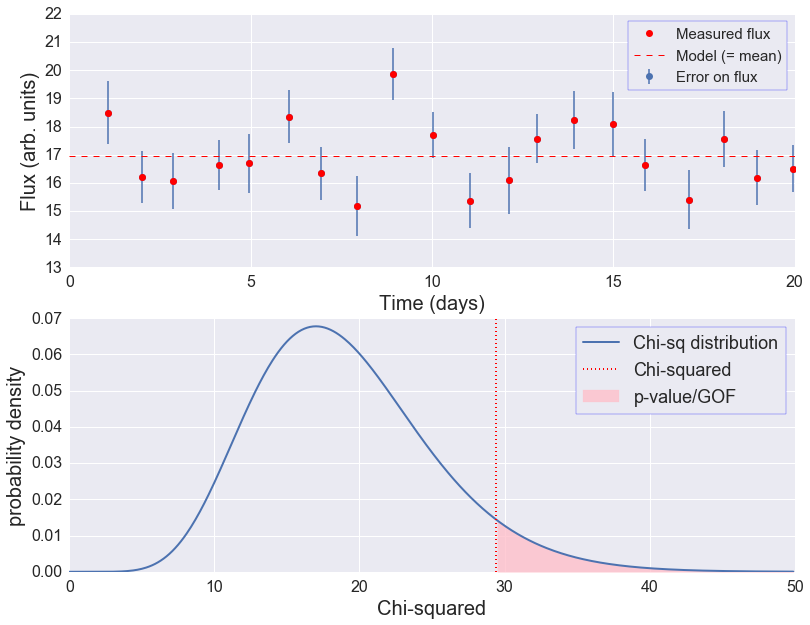

In [270]:
# Pull data from .txt file
rawdata = np.genfromtxt("star.txt", dtype=np.str, skip_header=1, autostrip=True, usecols=(0, 1, 2))

# Initialize lists to store data
x = []
y = []
yerr = []

# Extract data
for i in range(len(rawdata)):
    x.append(float(rawdata[i][0]))
    y.append(float(rawdata[i][1]))
    yerr.append(float(rawdata[i][2]))

def ChiSq(parm, xval, y, dy): # the weighted least-squares
    ymod = my_model(xval, parm) # model to be specified by a different function
    return sum(pow((y-ymod)/dy,2))

def my_model(xval, parm):
    return np.mean(parm)

parm = y

xsq_obs = ChiSq(parm, x, y, yerr)
print "Chi-squared = %.2f for mean %.2f" % (xsq_obs, my_model(s, parm))

ch = ss.chi2(len(x) - 1)
xch = np.arange(0.0, 50.0, 0.1)

pvalf = ch.sf(xsq_obs)

print "The p-value, i.e. goodness-of-fit, is %.4f" % pvalf
print "Thus our confidence that the null hypothesis is false is greater than %.2f%s" % (100 * (1 - pvalf), percent)
print "This corresponds to a sigma level of %.2f" % (p_to_sigmas(pvalf))

# Initialize figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,10))

# Draw plot
ax1.errorbar(x, y, yerr=yerr, marker="o", lw=1.5, linestyle='', label='Error on flux')
ax1.plot(x, y, 'o', c='red', label="Measured flux")
ax1.axhline(y=np.mean(y), linestyle='dashed', lw=1, color='red', label="Model (= mean)")
ax2.plot(xch, ch.pdf(xch), lw=2, label="Chi-sq distribution")
ax2.axvline(xsq_obs, color='r', linestyle='dotted', lw=2, label="Chi-squared")
ax2.fill_between(xch, 0, ch.pdf(xch), where=(xch>=xsq_obs), color='#ffc0cb', alpha=0.8, label="p-value/GOF")


# Plot layout
ax1.set_ylabel('Flux (arb. units)', fontsize=20)
ax1.set_xlabel('Time (days)', fontsize=20)
ax1.axis([0, 20, 13, 22])
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
leg = ax1.legend(loc="upper right", fontsize=15, frameon=True)
leg.get_frame().set_edgecolor('b')

ax2.set_xlabel("Chi-squared", fontsize=20)
ax2.set_ylabel("probability density", fontsize=20)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

leg2 = ax2.legend(loc="upper right", fontsize=18, frameon=True)
leg2.get_frame().set_edgecolor('b')
plt.show()

With the code below I improved the above found results using the scipy.optimize.minimize() function, i.e. the MLE method.

In [272]:
parm = np.zeros(1)

def my_model(xval, parm):
    return parm[0]

parm[0] = 16.

result = so.minimize(ChiSq, parm, args=(x, y, yerr), method="Nelder-Mead")

print "Chi-squared = %.2f, with a d.o.f. of %i" % (result["fun"], len(x) - len(parm))
print "Model result = %.2f" % result["x"][0]
print "goodness-of-fit = %.4f" % (ss.chi2.sf(result["fun"], len(x) - len(parm)))

Chi-squared = 29.42, with a d.o.f. of 19
Model result = 16.98
goodness-of-fit = 0.0596


These values differ from the previously calculated ones, because the previously calculated model result is just the mean and does not take into account the errors on the measurements. The last calculated value (16.98) does take into account the errors and is therefor a better fit. However, with a p-value/goodness-of-fit of almost 0.06 and a chi-squared of 29 with 19 degrees of freedom, I reject the null hypothesis, i.e. the star is not constant (= variable).

# Question 5.
Errors are still normally distributed so the weighted-least squares method is applicable.

For question (a) $\rightarrow$ H0: The assumed model y(x) = constant, corresponds to the observations.

For question (b), (c) and (d) $\rightarrow$ H0: The assumed model: y(x) = A * sin(2$\pi$Bx + C) + D, corresponds to the observations.


The null hypothesis (b) does not have to be rejected. Eventhough we have a confidence of 14% that it is false, looking at the residuals one can conclude that there is no systematic error. Also is every datapoints except one within range of zero residual when the errors are taken into account.



---------------------------------------------------------------------------------------------
Results question (a)

Chi-square = 207.44
Model result = 15.82
goodness-of-fit = 1.12e-33, so reject hypothesis that the flux is constant.
d.o.f. = 19

---------------------------------------------------------------------------------------------
Results question (b), (c) and (d)

Chi-squared = 10.11 

Model: 
A = -4.1556
B = 0.1287
C = -2.4135
D = 15.9732
goodness-of-fit = 0.8608, 
d.o.f. = 16


Model (using curve_fit):
A = -4.1556 +/- 0.2364
B = 0.1287 +/- 0.0018
C = -2.4135 +/- 0.1439
D = 15.9732 +/- 0.1750,
d.o.f. = 16


The model seems accurate, but the chi-squared value is disturbingly low, which raises suspicion about the errorbars. They might be overestimated.


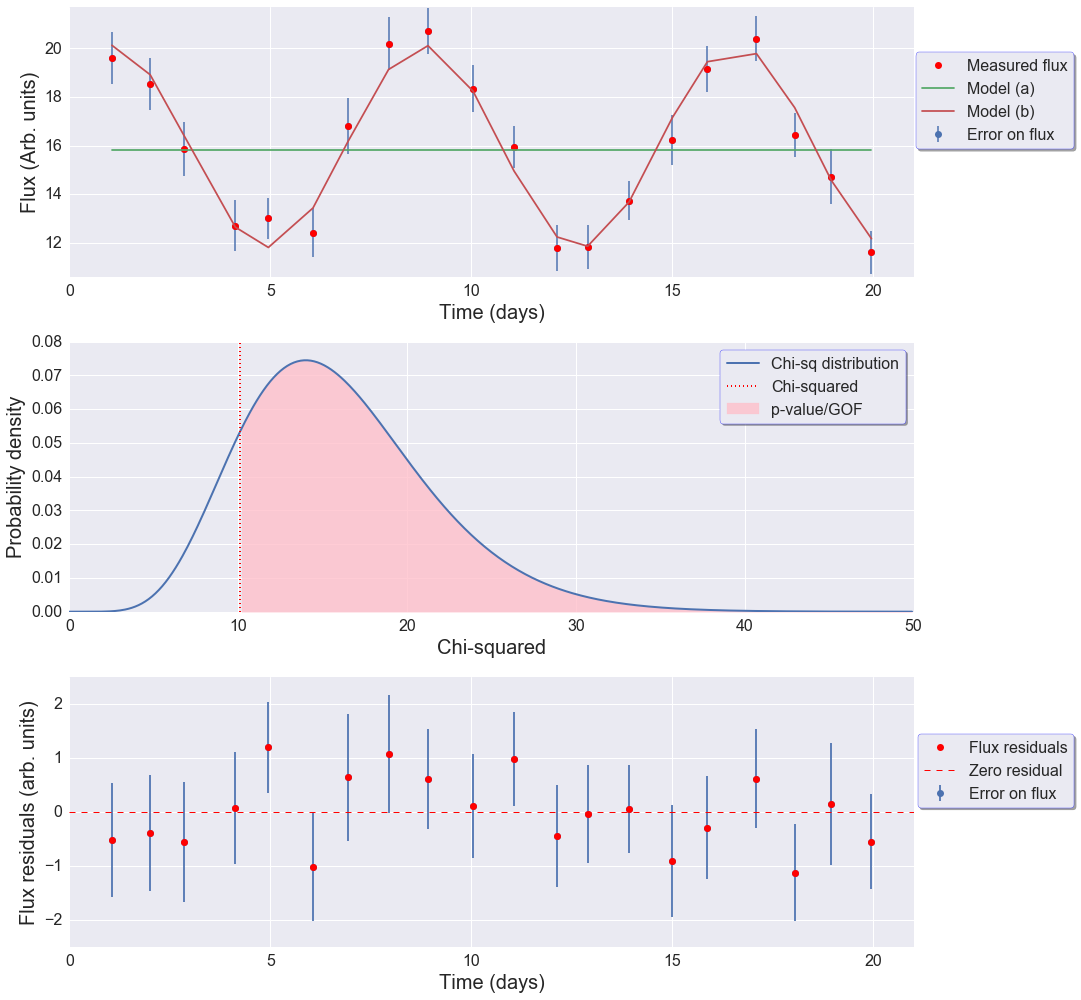

In [267]:
# Pull data from .txt file
rawdata = np.genfromtxt("star.txt", dtype=np.str, skip_header=1, autostrip=True, usecols=(0, 3, 4))

# Initialize lists to store data and reset parameters
x = []
y = []
yerr = []
ch = 0; xch = 0; pvalf = 0;

# Extract data
for i in range(len(rawdata)):
    x.append(float(rawdata[i][0]))
    y.append(float(rawdata[i][1]))
    yerr.append(float(rawdata[i][2]))

# Transform x from list to numpy array to use it in the calculations
x = np.array(x)

def ChiSq1(parm, xval, y, dy): # the weighted least-squares
    ymod = my_model1(xval, parm) # model to be specified by a different function
    return sum(pow((y-ymod)/dy,2))
    
def my_model1(xval, parm):
    return parm[0] * np.sin( 2 * np.pi * parm[1] * xval + parm[2]) + parm[3]

def mycf_model1(xval, *parm):
    return parm[0] * np.sin( 2 * np.pi * parm[1] * xval + parm[2]) + parm[3]

######### Question (a) #########################################################################################################
print "\n---------------------------------------------------------------------------------------------\nResults question (a)\n"
parm = np.zeros(1)

parm[0] = np.mean(y)

result = so.minimize(ChiSq, parm, args=(x, y, yerr), method="Nelder-Mead")

# Create numpy array of results to plot the model later on
modela = np.array([result["x"][0]]*len(x))

print "Chi-square = %.2f" % result["fun"]
print "Model result = %.2f" % result["x"][0]

print "goodness-of-fit = %.4g, so reject hypothesis that the flux is constant." % (ss.chi2.sf(result["fun"], len(x) - len(parm)))
print "d.o.f. = %i" % (len(x) - len(parm))


######### Question (b) #########################################################################################################
print "\n---------------------------------------------------------------------------------------------\nResults question (b), (c) and (d)\n"

parm = np.zeros(4)

# The model parameters, estimated from plot
parm = ([5, 1./12, 0, np.mean(y)])

result = so.minimize(ChiSq1, parm, args=(x, y, yerr), method="Nelder-Mead")

# Assign model parameters
A = result["x"][0]
B = result["x"][1]
C = result["x"][2]
D = result["x"][3]

modelb = A * np.sin( 2 * np.pi * B * x + C) + D

print "Chi-squared = %.2f" % result["fun"], '\n'
print "Model: "
print "A = %.4f" % A
print "B = %.4f" % B
print "C = %.4f" % C
print "D = %.4f" % D

GOF = ss.chi2.sf(result["fun"], len(x) - len(parm))

print "goodness-of-fit = %.4f, " % (GOF)
print "d.o.f. = %i" % (len(x) - len(parm))

print "\n"

# Get confidence intervals on A, B, C and D
p0 = [A, B, C, D]
ml_cfpars, ml_cfcovar = so.curve_fit(mycf_model1, x, y, p0, sigma=yerr)
err = np.sqrt(np.diag(ml_cfcovar))

print"Model (using curve_fit):"
print "A = %.4f +/- %.4f" % ((ml_cfpars[0]), (err[0]))
print "B = %.4f +/- %.4f" % ((ml_cfpars[1]), (err[1]))
print "C = %.4f +/- %.4f" % ((ml_cfpars[2]), (err[2]))
print "D = %.4f +/- %.4f," % ((ml_cfpars[3]), (err[3]))
print "d.o.f. = %i" % (len(x) - len(parm))
print "\n"
print "The model seems accurate, but the chi-squared value is disturbingly low, which raises suspicion about the errorbars. They might be overestimated."

ch = ss.chi2(len(x) - len(parm))
xch = np.arange(0.0, 50.0, 0.1)

# Initialize figure
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(13,14))

# Draw plots
ax1.errorbar(x, y, yerr=yerr, marker="o", lw=1.5, linestyle='', label='Error on flux')
ax1.plot(x, y, 'o', c='red', label="Measured flux")
ax1.plot(x, modela, label="Model (a)")
ax1.plot(x, modelb, label="Model (b)")

ax2.plot(xch, ch.pdf(xch), lw=2, label="Chi-sq distribution")
ax2.axvline(result["fun"], color='r', linestyle='dotted', lw=2, label="Chi-squared")
ax2.fill_between(xch, 0, ch.pdf(xch), where=(xch>=result["fun"]), color='#ffc0cb', alpha=0.8, label="p-value/GOF")

ax3.errorbar(x, y - modelb, yerr=yerr, marker="o", linestyle='', label="Error on flux")
ax3.plot(x, y - modelb, 'o', c='red', label="Flux residuals")
ax3.axhline(y = 0, linestyle='dashed', color='red', lw=1, label="Zero residual")

# Plot layout
ax1.set_ylabel('Flux (Arb. units)', fontsize=20)
ax1.set_xlabel('Time (days)', fontsize=20)
ax1.axis([0, 21, min(y) - 1, max(y) + 1])
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
leg = ax1.legend(bbox_to_anchor=(.19, 0.6, 1., .102), loc=7, borderaxespad=0., fontsize=16, shadow=True,fancybox=True, frameon=True)
leg.get_frame().set_edgecolor('b')

ax2.set_xlabel("Chi-squared", fontsize=20)
ax2.set_ylabel("Probability density", fontsize=20)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
leg2 = ax2.legend(loc='upper right', fontsize=16, shadow=True,fancybox=True, frameon=True)
leg2.get_frame().set_edgecolor('b')

ax3.set_xlabel("Time (days)", fontsize=20)
ax3.set_ylabel("Flux residuals (arb. units)", fontsize=20)
ax3.axis([0, 21, -2.5, 2.5])
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)
leg3 = ax3.legend(bbox_to_anchor=(.19, 0.6, 1., .102), loc=7, borderaxespad=0., fontsize=16, shadow=True,fancybox=True, frameon=True)
leg3.get_frame().set_edgecolor('b')

plt.tight_layout()
plt.show()



# Question 6.


 ------------ Constant model results ------------

Chi-squared = 3548.16 

Model: 
alpha = -1.0839
goodness-of-fit =  0
d.o.f. = 12

 ------------ Linear model results ------------

Chi-squared = 172.47 

Model: 
alpha = 0.8036
beta = -0.3444
goodness-of-fit = 3.666e-31
d.o.f. = 11

 ------------ Quadratic model results ------------

Chi-squared = 10.51 

Model: 
alpha = -0.1316
beta = 0.0696
gamma = -0.0414
goodness-of-fit = 0.3972,
d.o.f. = 10


Using curve-fit: 
Alpha = -0.1316 +/- 0.0828
Beta = 0.0696 +/- 0.0339
Gamma = -0.0414 +/- 0.0033,
d.o.f. = 10


Obviously the quadratic model is the best and the only suitable of the three models. It has an almost perfect chi-squared value
and an acceptable goodness-of-fit. The other two models clearly fail at these aspects. Looking at the residuals one finds
systemtic errors in the constant model as well as the linear model. The residuals of the quadratic model show an even
distribution around the null-line.


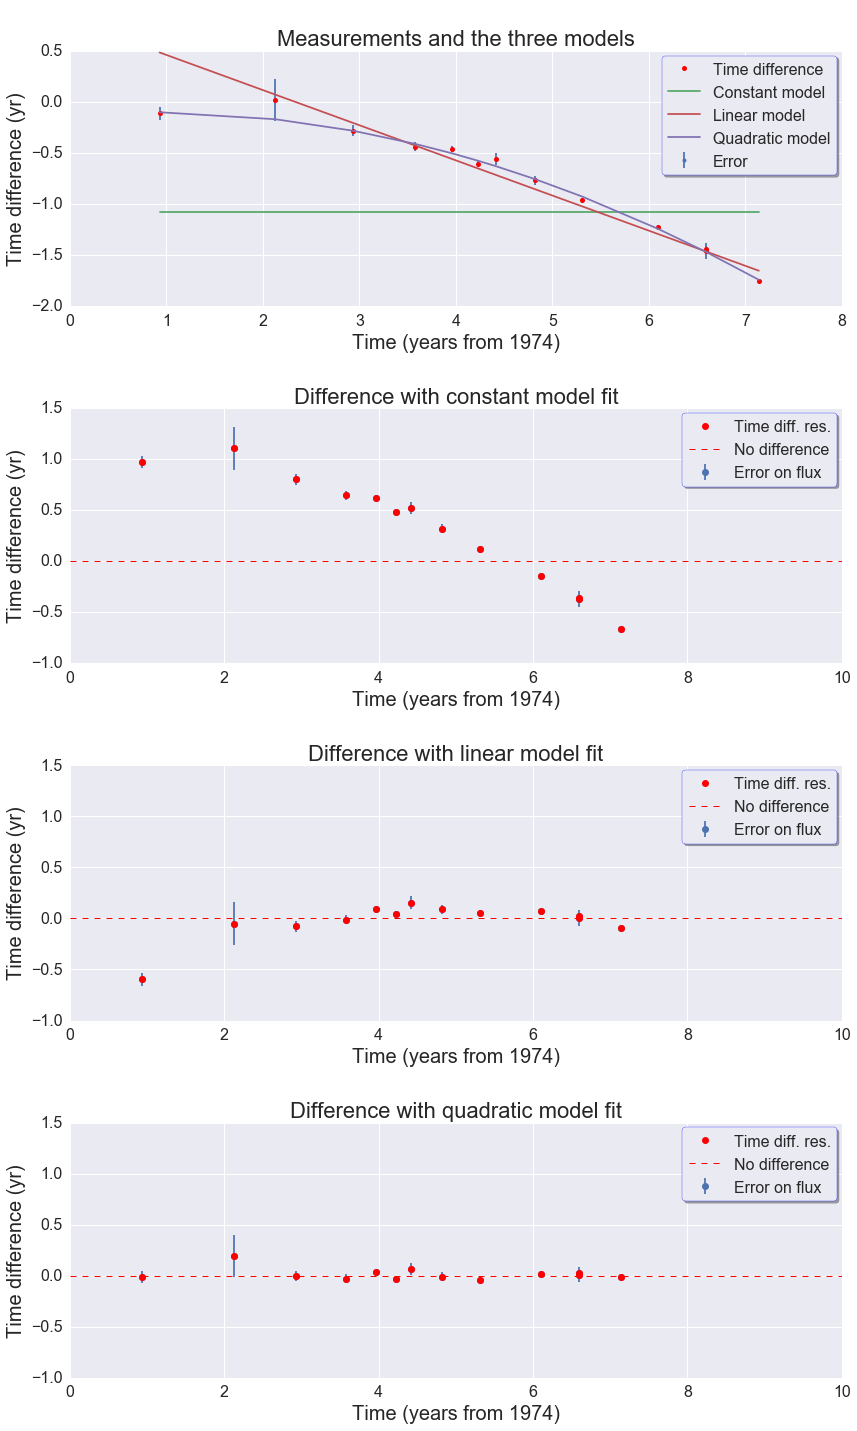

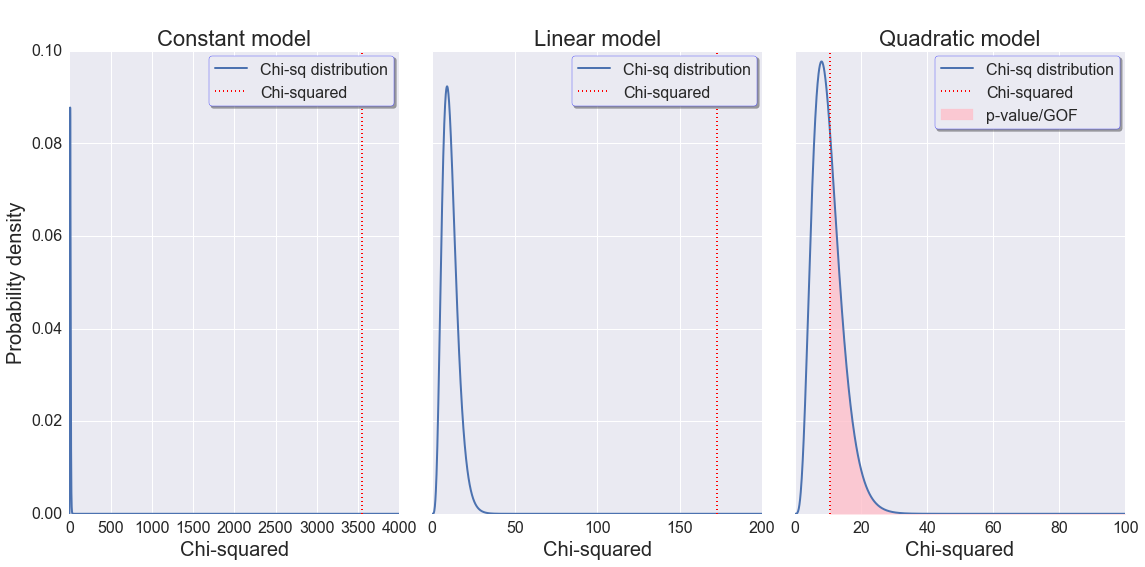

In [268]:
# Read in data
rawdata = np.genfromtxt("pulsar-timing.txt", dtype=np.float, skip_header=1, autostrip=True)
observations = np.arange(len(rawdata))

# Initialize lists to store data
obs = np.zeros(len(rawdata))
date = np.zeros(len(rawdata))
dt = np.zeros(len(rawdata))
err = np.zeros(len(rawdata))

# Extract data
for i in observations:
    obs[i] = rawdata[i][0]
    date[i] = rawdata[i][1] - 1974
    dt[i] = rawdata[i][2]
    err[i] = rawdata[i][3]
    
def ChiSqcon(parm, xval, y, dy): # the weighted least-squares
    ymod = my_modelcon(xval, parm) # model to be specified by a different function
    return sum(pow((y-ymod)/dy,2))
    
def my_modelcon(xval, parm):
    return parm[0]

def ChiSqlin(parm, xval, y, dy): # the weighted least-squares
    ymod = my_modellin(xval, parm) # model to be specified by a different function
    return sum(pow((y-ymod)/dy,2))
    
def my_modellin(xval, parm):
    return parm[0] + parm[1] * xval
    
def ChiSqqua(parm, xval, y, dy): # the weighted least-squares
    ymod = my_modelqua(xval, parm) # model to be specified by a different function
    return sum(pow((y-ymod)/dy,2))
    
def my_modelqua(xval, parm):
    return parm[0] + parm[1] * xval + parm[2] * xval**2

def mycf_modelqua(xval, *parm):
    return parm[0] + parm[1] * xval + parm[2] * xval**2

### FITTING CONSTANT MODEL ---------------------------------------------------------------------------------------------------
print "\n ------------ Constant model results ------------\n"
parm = np.zeros(1)
parm = [np.mean(dt)]

resultcon = so.minimize(ChiSqcon, parm, args=(date, dt, err), method="Nelder-Mead")

# Assign model parameter
A = resultcon["x"][0]

print "Chi-squared = %.2f \n" % resultcon["fun"]
print "Model: "
print "alpha = %.4f" % A

GOF = ss.chi2.sf(resultcon["fun"], len(date) - len(parm))

print "goodness-of-fit =  %.4g" % (GOF)
print "d.o.f. = %i" % (len(date) - len(parm))

# Create numpy array of results to plot the model later on
conmodel = np.array([resultcon["x"][0]]*len(date))

chcon = ss.chi2(len(date) - len(parm))


### FITTING LINEAR MODEL ---------------------------------------------------------------------------------------------------
print "\n ------------ Linear model results ------------\n"
parm = np.zeros(2)
parm = [1, -2]
resultlin = so.minimize(ChiSqlin, parm, args=(date, dt, err), method="Nelder-Mead")

# Assign model parameter
A = resultlin["x"][0]
B = resultlin["x"][1]

linmodel = A + B * date

print "Chi-squared = %.2f \n" % resultlin["fun"]
print "Model: "
print "alpha = %.4f" % A
print "beta = %.4f" % B

GOF = ss.chi2.sf(resultlin["fun"], len(date) - len(parm))

print "goodness-of-fit = %.4g" % (GOF)
print "d.o.f. = %i" % (len(date) - len(parm))

linmodel = A + B * date

chlin = ss.chi2(len(date) - len(parm))


### FITTING Quadratic MODEL ---------------------------------------------------------------------------------------------------
print "\n ------------ Quadratic model results ------------\n"
parm = np.zeros(3)
parm = [1., 1., 1.]
resultqua = so.minimize(ChiSqqua, parm, args=(date, dt, err), method="Nelder-Mead")

# Assign model parameters
A = resultqua["x"][0]
B = resultqua["x"][1]
C = resultqua["x"][2]

print "Chi-squared = %.2f \n" % resultqua["fun"]
print "Model: "
print "alpha = %.4f" % A
print "beta = %.4f" % B
print "gamma = %.4f" % C

GOF = ss.chi2.sf(resultqua["fun"], len(date) - len(parm))

print "goodness-of-fit = %.4f," % (GOF)
print "d.o.f. = %i" % (len(date) - len(parm))

quamodel = A + B * date + C * date**2

chqua = ss.chi2(len(date) - len(parm))

# Get confidence intervals on A, B, C and D
p0 = [A, B, C]
ml_cfpars, ml_cfcovar = so.curve_fit(mycf_modelqua, date, dt, p0, sigma=err)
conerr = np.sqrt(np.diag(ml_cfcovar))

print "\n"
print "Using curve-fit: "
print "Alpha = %.4f +/- %.4f" % ((ml_cfpars[0]), (conerr[0]))
print "Beta = %.4f +/- %.4f" % ((ml_cfpars[1]), (conerr[1]))
print "Gamma = %.4f +/- %.4f," % ((ml_cfpars[2]), (conerr[2]))
print "d.o.f. = %i" % (len(date) - len(parm))
print "\n"
print "Obviously the quadratic model is the best and the only suitable of the three models. \
It has an almost perfect chi-squared value\nand an acceptable goodness-of-fit. The other two \
models clearly fail at these aspects. Looking at the residuals one finds\nsystemtic errors in\
 the constant model as well as the linear model. The residuals of the quadratic model show \
an even\ndistribution around the null-line."

# Initialize figure
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))

# Draw plots
ax1.errorbar(date, dt, yerr=err, marker='o', markersize=4, linestyle = '', label="Error")
ax1.plot(date, dt, marker='o', markersize=5, linestyle = '', label = "Time difference", c='red')
ax1.plot(date, conmodel, label="Constant model")
ax1.plot(date, linmodel, label="Linear model")
ax1.plot(date, quamodel, label="Quadratic model")

ax2.errorbar(date, dt - conmodel, yerr=err, marker="o", linestyle='', label="Error on flux")
ax2.plot(date, dt - conmodel, 'o', c='red', label="Time diff. res.")
ax2.axhline(y = 0, linestyle='dashed', color='red', lw=1, label="No difference")

ax3.errorbar(date, dt - linmodel, yerr=err, marker="o", linestyle='', label="Error on flux")
ax3.plot(date, dt - linmodel, 'o', c='red', label="Time diff. res.")
ax3.axhline(y = 0, linestyle='dashed', color='red', lw=1, label="No difference")

ax4.errorbar(date, dt - quamodel, yerr=err, marker="o", linestyle='', label="Error on flux")
ax4.plot(date, dt - quamodel, 'o', c='red', label="Time diff. res.")
ax4.axhline(y = 0, linestyle='dashed', color='red', lw=1, label="No difference")


# Lay-out plot 1
ax1.set_title("\nMeasurements and the three models", fontsize=22)
ax1.set_ylabel('Time difference (yr)', fontsize=20)
ax1.set_xlabel('Time (years from 1974)', fontsize=20)
#ax1.axis([1974, 1982, -2, 1])
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
#ax1.set_xticks(np.arange(1974, 1983, 1))
leg = ax1.legend(loc="upper right", borderaxespad=0.3, fontsize=16, shadow=True,fancybox=True, frameon=True)
leg.get_frame().set_edgecolor('b')


def resplotlayout(ax, plottitle):
    ax.set_title("\n"+plottitle, fontsize=22)
    ax.set_ylabel('Time difference (yr)', fontsize=20)
    ax.set_xlabel('Time (years from 1974)', fontsize=20)
    ax.axis([0, 10, -1, 1.5])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
#    ax.set_xticks(np.arange(1974, 1983, 1))
    leg = ax.legend(loc='upper right', borderaxespad=0.3, fontsize=16, shadow=True,fancybox=True, frameon=True)
    leg.get_frame().set_edgecolor('b')
    return 0

def chiplotlayout(ax, xmax, figtitle):
    ax.set_title("\n"+figtitle, fontsize=22)
    ax.set_xlabel('Chi-squared', fontsize=20)
    ax.axis([0, xmax, 0, 0.1])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    leg = ax.legend(loc='upper right', borderaxespad=0.3, fontsize=16, shadow=True,fancybox=True, frameon=True)
    leg.get_frame().set_edgecolor('b')
    return 0


resplotlayout(ax2, "Difference with constant model fit")
resplotlayout(ax3, "Difference with linear model fit")
resplotlayout(ax4, "Difference with quadratic model fit")


plt.tight_layout()
plt.show()

xchcon = np.arange(0, 4000, 0.1)
xchlin = np.arange(0, 200, 0.1)
xchqua = np.arange(0, 100, 0.1)


fig2, (ax5, ax6, ax7) = plt.subplots(1, 3, sharey=True, figsize=(16, 8))

ax5.plot(xchcon, chcon.pdf(xchcon), lw=2, label="Chi-sq distribution")
ax5.axvline(resultcon["fun"], color='r', linestyle='dotted', lw=2, label="Chi-squared")
ax5.legend()

ax6.plot(xchlin, chlin.pdf(xchlin), lw=2, label="Chi-sq distribution")
ax6.axvline(resultlin["fun"], color='r', linestyle='dotted', lw=2, label="Chi-squared")
ax6.legend()

ax7.plot(xchqua, chqua.pdf(xchqua), lw=2, label="Chi-sq distribution")
ax7.axvline(resultqua["fun"], color='r', linestyle='dotted', lw=2, label="Chi-squared")
ax7.fill_between(xchqua, 0, chqua.pdf(xchqua), where=(xchqua>=resultqua["fun"]), color='#ffc0cb', alpha=0.8, label="p-value/GOF")
ax7.legend()


chiplotlayout(ax5, max(xchcon), "Constant model")
chiplotlayout(ax6, max(xchlin), "Linear model")
chiplotlayout(ax7, max(xchqua), "Quadratic model")

ax5.set_ylabel('Probability density', fontsize=20)


plt.tight_layout()
plt.show()

# Question 7.

Minimum counts per bin is 20, since we are using X-ray astronomy data, to make sure the errors on the bins are normally distributed. Hence, we can use the weighted least-squares method to calculate the MLE's.

Data log-normal distributed so integral is the cdf

15233
         Current function value: 32.078589
         Iterations: 9
         Function evaluations: 254
         Gradient evaluations: 49
mu = 0.1540 +/- 0.0573
sigma = 0.3352 +/- 0.0194
scale = 0.9275 +/- 0.0627
Minimum Chi-squared = 32.08 for 29 d.o.f.
The goodness of fit is: 0.3164


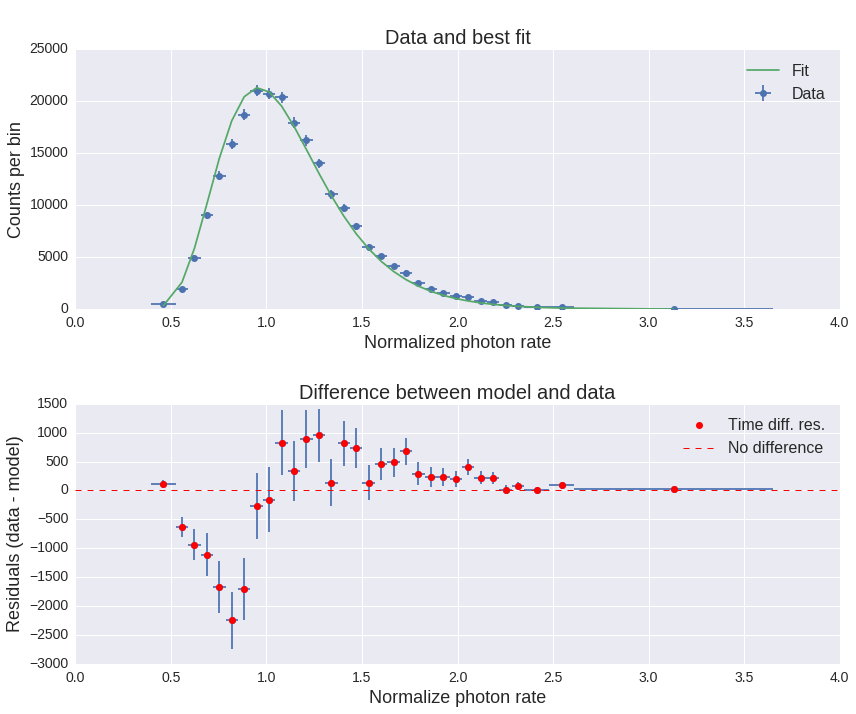

In [14]:
import scipy.integrate as si

def histrebin(mininbin,counts,edges): # rebins a histogram so there are at least mininbin counts per bin

    edges2=np.zeros(1)
    counts2=np.zeros(1)
    i=0
    countsum=0
    firstbin_flag = 1
    edges2[0]=edges[0]
    for x in counts:
        countsum=countsum+x
        i=i+1
        if countsum >= mininbin and (sum(counts[i:]) >= mininbin or i == len(counts)):  # The sum over counts in 
            # remaining bins ensures that we are not left with a bin with counts less than our limit at the end.
            if firstbin_flag == 1: # if this is the first bin satisfying our requirement, 
                # do not append but replace bin 0 with countsum
                counts2[0]=countsum
                firstbin_flag = 0 # now we read the first bin we can switch this off
            else:
                counts2=np.append(counts2,countsum)
            edges2=np.append(edges2,edges[i])
            countsum=0        

    return counts2, edges2


def searchzero(data):
    indexlist = []
    for i in range(len(data)):
        if data[i] == 0.0:
            indexlist.append(i)
    return indexlist
            
def ChiSqBin(parm, xval, y, dy): # the weighted least-squares
    mod = my_fitmodel(xval, parm)
    
    ymod1 = np.diff(mod)
    
    k = 0
    ymod = np.zeros(len(y))
    
    for k in range(len(xval) - 1):
        ymod[k] = ymod1[k] / (xval[k+1] - xval[k])
        k+=1

    return sum(pow((y-ymod)/dy,2))
    
    
def my_fitmodel(xval, parm):
    return ss.lognorm.cdf(xval, s=parm[1], loc=parm[0], scale=parm[2]) * 15000

# Read in data
rawdata = np.genfromtxt("cygx1_xray.dat", dtype=np.float, skip_header=1, autostrip=True)
observations = np.arange(len(rawdata))

# Initialize lists to store data
binnum = np.zeros(len(rawdata))
rate = np.zeros(len(rawdata))
removed = 0

# Extract data
for i in observations:
    binnum[i] = rawdata[i][0]
    rate[i] = rawdata[i][1] / 1000

zero_index = searchzero(rate)
new_bin = np.delete(binnum, zero_index)
new_rate = np.delete(rate, zero_index)
print new_rate.size
### Now we make our unbinned histogram.  We can keep the initial number of bins relatively large.
nbins = 50
rmin = min(new_rate)
rmax = max(new_rate)
counts, edges = np.histogram(new_rate, bins=nbins, range=[rmin,rmax], density=False)

### And now we use our new function to rebin so there are at least mincounts counts per bin:
mincounts = 20  # Here we set it to our minimum requirement of 20, but in principle you could set it higher
counts2, edges2 = histrebin(mincounts,counts,edges)

rates = (edges2[:-1]+edges2[1:])/2.  # This calculates the energy bin centres
# print rates
bwidths = np.diff(edges2) # calculates the width of each bin
# print bwidths
cdens = counts2/bwidths # determines the count densities
cdens_err = np.sqrt(counts2)/bwidths # calculate the errors: remember the error is based on the counts, 
# not the count density, so we have to also apply the same normalisation.
# print cdens
x = np.arange(0, 4, .01)
mu = 0.16
sigm = 0.3
scale = 0.9

#print mu, sigm
#print new_rate, len(new_rate)
#print rates, len(rates)
#print np.mean(rates), np.std(rates,ddof=1)
#print len(edges2), len(cdens), len(cdens_err)
#print 'edges2 = ', edges2, len(edges2)
#print 'rates = ', rates, len(rates)

parm = [mu, sigm, scale]
ml_pars, ml_funcval, ml_grad, ml_covar, func_calls, grad_calls, warnflag = \
so.fmin_bfgs(ChiSqBin, parm, args=(edges2, cdens, cdens_err), full_output=True)

err = np.sqrt(np.diag(ml_covar))
print "mu = %.4f +/- %.4f" % (ml_pars[0], err[0])
print "sigma = %.4f +/- %.4f" % (ml_pars[1], err[1])
print "scale = %.4f +/- %.4f" % (ml_pars[2], err[2])
print "Minimum Chi-squared = %.2f for %i d.o.f." % (ml_funcval, len(cdens)-len(parm))
print "The goodness of fit is: %.4f" % ss.chi2.sf(ml_funcval,df=(len(cdens)-len(parm)))

modelfit = ss.lognorm.pdf(rates, loc=ml_pars[0], s=ml_pars[1], scale=parm[2])*new_rate.size

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))
ax1.errorbar(rates, cdens, xerr=bwidths/2., yerr=cdens_err, fmt='o', label='Data')
ax1.plot(rates, modelfit, label='Fit')

ax2.errorbar(rates, cdens - modelfit, xerr=bwidths/2., yerr=cdens_err, fmt='o')
ax2.plot(rates, cdens - modelfit, 'o', c='red', label="Time diff. res.")
ax2.axhline(y = 0, linestyle='dashed', color='red', lw=1, label="No difference")

ax1.set_title("\nData and best fit", fontsize=20)
ax1.set_xlabel("Normalized photon rate", fontsize=18)
ax1.set_ylabel("Counts per bin", fontsize=18)
ax1.set_xlim(0., 4.)
ax1.set_ylim(0., 25000.)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(fontsize=16)

ax2.set_title("\nDifference between model and data", fontsize=20)
ax2.set_xlabel("Normalize photon rate", fontsize=18)
ax2.set_ylabel("Residuals (data - model)", fontsize=18)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(fontsize=16)

plt.tight_layout()
plt.show()                                      